In [1]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import numpy as np

import cv2

from sklearn.metrics import classification_report
from keras.models import load_model
import matplotlib.pyplot as plt

from keras.callbacks import CSVLogger
from keras import metrics
from keras import backend as K
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
datasetAF = pd.read_csv("D:\\Dropbox\\utd\\cs courses\\cs 4375 machine learning\\assignments\\project\\rating csv data\\All_Ratings asian female csv.txt",header = 0)
avgPerFile = datasetAF['Rating'].groupby(datasetAF['Filename'],sort=False)
averagePerFileMean = avgPerFile.mean()
preparedAFDataset = pd.DataFrame({'Filename':averagePerFileMean.index, 'Avg Rating':averagePerFileMean.values})
labels = preparedAFDataset['Avg Rating']
labels

0       2.333333
1       3.950000
2       3.183333
3       2.683333
4       2.000000
5       1.566667
6       2.566667
7       2.750000
8       2.150000
9       3.433333
10      2.316667
11      2.083333
12      3.350000
13      1.716667
14      2.800000
15      2.100000
16      2.933333
17      2.566667
18      3.033333
19      2.733333
20      2.516667
21      2.416667
22      3.300000
23      2.433333
24      1.766667
25      2.250000
26      2.666667
27      2.266667
28      3.050000
29      3.100000
          ...   
1970    1.933333
1971    4.083333
1972    4.750000
1973    2.650000
1974    2.116667
1975    1.083333
1976    4.450000
1977    3.916667
1978    2.566667
1979    3.533333
1980    3.766667
1981    3.266667
1982    3.883333
1983    2.333333
1984    4.183333
1985    1.016667
1986    1.800000
1987    1.966667
1988    3.500000
1989    4.166667
1990    2.016667
1991    3.833333
1992    3.900000
1993    2.683333
1994    1.316667
1995    1.600000
1996    1.433333
1997    2.7333

In [3]:
#needed to join path because windows
train_path = os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/AF/AF/')
images = []
#adapted from https://www.quora.com/How-do-I-load-train-and-test-data-from-the-local-drive-for-a-deep-learning-Keras-model
#listdir returns a list containing the names of the entries in the directory given by path.
for sample in listdir(train_path):
    img_path = train_path + sample #sample is every file in the train directory
    x = cv2.imread(img_path) #loading file
    x = cv2.resize(x, (96, 96))
    # preprocessing if required
    images.append(x) #adding to x_train array
#scale all pixels to between 0 and 1
imagesNumPy = np.array(images, dtype="float") / 255.0


In [4]:
imagesNumPy.shape

(2000, 96, 96, 3)

In [5]:
labels.shape

(2000,)

In [6]:
(trainX, testX, trainY, testY) = train_test_split(imagesNumPy, labels,test_size=0.25, random_state=42)

In [7]:
#run this model with Dense(notDefinedVariable) to see functions in tensorflow that are to be depreciated
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=trainX.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
#1 because it outputs only one rating
model.add(Dense(1))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# Let's train the model using RMSprop
model.compile(loss=root_mean_squared_error,
              optimizer=opt,
              metrics=[metrics.mae])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
csv_logger = CSVLogger(os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous RMSE/callbacks1.log'), separator=',', append=False)
modelHistory = model.fit(trainX, trainY,
              batch_size=32,
              epochs=250,
              validation_data=(testX, testY),
              shuffle=True, callbacks=[csv_logger])

Train on 1500 samples, validate on 500 samples
Epoch 1/250
1500/1500 [==============================] - 68s 46ms/step - loss: 3.1198 - mean_absolute_error: 2.8716 - val_loss: 0.9678 - val_mean_absolute_error: 0.7933
Epoch 2/250
1500/1500 [==============================] - 65s 43ms/step - loss: 1.0483 - mean_absolute_error: 0.8664 - val_loss: 0.9069 - val_mean_absolute_error: 0.7394
Epoch 3/250
1500/1500 [==============================] - 65s 43ms/step - loss: 0.9440 - mean_absolute_error: 0.7575 - val_loss: 0.9248 - val_mean_absolute_error: 0.7444
Epoch 4/250
1500/1500 [==============================] - 65s 43ms/step - loss: 0.8762 - mean_absolute_error: 0.7020 - val_loss: 1.0563 - val_mean_absolute_error: 0.8758
Epoch 5/250
1500/1500 [==============================] - 65s 44ms/step - loss: 0.9163 - mean_absolute_error: 0.7439 - val_loss: 1.1566 - val_mean_absolute_error: 0.9770
Epoch 6/250
1500/1500 [==============================] - 65s 43ms/step - loss: 0.8744 - mean_absolute_error:

Epoch 49/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.6002 - mean_absolute_error: 0.4822 - val_loss: 1.0555 - val_mean_absolute_error: 0.8817
Epoch 50/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.5975 - mean_absolute_error: 0.4801 - val_loss: 0.8824 - val_mean_absolute_error: 0.7110
Epoch 51/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.5876 - mean_absolute_error: 0.4716 - val_loss: 0.8768 - val_mean_absolute_error: 0.7132
Epoch 52/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.5821 - mean_absolute_error: 0.4708 - val_loss: 0.8442 - val_mean_absolute_error: 0.6848
Epoch 53/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.5894 - mean_absolute_error: 0.4720 - val_loss: 0.8134 - val_mean_absolute_error: 0.6625
Epoch 54/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.5833 - mean_absolute_error: 0.4668 - val_loss: 0.8556 - val_mean_abs

1500/1500 [==============================] - 64s 43ms/step - loss: 0.4490 - mean_absolute_error: 0.3571 - val_loss: 0.7991 - val_mean_absolute_error: 0.6411
Epoch 146/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4551 - mean_absolute_error: 0.3624 - val_loss: 0.8003 - val_mean_absolute_error: 0.6485
Epoch 147/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4422 - mean_absolute_error: 0.3486 - val_loss: 0.8455 - val_mean_absolute_error: 0.6866
Epoch 148/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4489 - mean_absolute_error: 0.3583 - val_loss: 0.8442 - val_mean_absolute_error: 0.6847
Epoch 149/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4465 - mean_absolute_error: 0.3558 - val_loss: 0.8808 - val_mean_absolute_error: 0.7110
Epoch 150/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4239 - mean_absolute_error: 0.3420 - val_loss: 0.8048 - val_mean_absolute_er

Epoch 193/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4147 - mean_absolute_error: 0.3296 - val_loss: 0.7721 - val_mean_absolute_error: 0.6202
Epoch 194/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4019 - mean_absolute_error: 0.3183 - val_loss: 0.7896 - val_mean_absolute_error: 0.6359
Epoch 195/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4181 - mean_absolute_error: 0.3305 - val_loss: 0.7832 - val_mean_absolute_error: 0.6295
Epoch 196/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4087 - mean_absolute_error: 0.3272 - val_loss: 0.8230 - val_mean_absolute_error: 0.6616
Epoch 197/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4217 - mean_absolute_error: 0.3356 - val_loss: 0.7766 - val_mean_absolute_error: 0.6195
Epoch 198/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.4184 - mean_absolute_error: 0.3364 - val_loss: 0.8337 - val_me

Epoch 241/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3982 - mean_absolute_error: 0.3160 - val_loss: 0.7895 - val_mean_absolute_error: 0.6364
Epoch 242/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3878 - mean_absolute_error: 0.3092 - val_loss: 0.7910 - val_mean_absolute_error: 0.6352
Epoch 243/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3877 - mean_absolute_error: 0.3087 - val_loss: 0.8126 - val_mean_absolute_error: 0.6554
Epoch 244/250
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3926 - mean_absolute_error: 0.3087 - val_loss: 0.7851 - val_mean_absolute_error: 0.6317
Epoch 245/250
1500/1500 [==============================] - 65s 43ms/step - loss: 0.3870 - mean_absolute_error: 0.3085 - val_loss: 0.8014 - val_mean_absolute_error: 0.6470
Epoch 246/250
1500/1500 [==============================] - 66s 44ms/step - loss: 0.3973 - mean_absolute_error: 0.3165 - val_loss: 0.7747 - val_me

In [9]:
model_path = os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous RMSE/model1.h5')
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:/Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous RMSE/model1.h5 


In [10]:
modelHistory.history

{'val_loss': [0.9677622337341308,
  0.9068993234634399,
  0.9248163127899169,
  1.0562802238464355,
  1.1566196813583374,
  1.1024490671157836,
  0.9856624345779419,
  1.1573578424453734,
  0.8818539552688599,
  0.9703070669174194,
  0.7617855076789856,
  0.9124858932495117,
  1.1033708114624023,
  0.9197438983917237,
  0.980379672050476,
  1.2300205068588257,
  0.9225682263374329,
  0.9695490779876709,
  1.0440256805419923,
  0.8738414974212646,
  0.8930593180656433,
  0.7836177897453308,
  0.9674325342178345,
  0.8555187063217163,
  0.8616721615791321,
  1.0343329000473023,
  0.8035532102584839,
  1.0359362468719482,
  0.9176499252319336,
  0.854642550945282,
  0.8289389200210572,
  0.9679444494247437,
  0.943253191947937,
  0.8563463945388794,
  0.9919958152770996,
  0.8956178321838378,
  0.912946831703186,
  0.9146093549728394,
  0.8710685949325562,
  0.8747647123336793,
  0.8927234754562378,
  0.8639650049209595,
  0.8552302465438842,
  0.8809240689277649,
  0.8871044549942017,
  

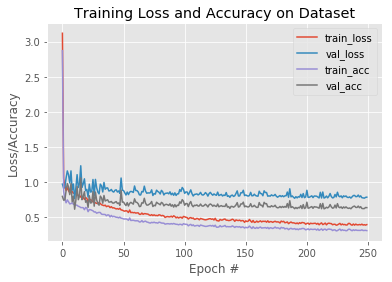

In [12]:
#N is the number of epochs
#plot code from https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
N = 250
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), modelHistory.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), modelHistory.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), modelHistory.history["mean_absolute_error"], label="train MAE")
plt.plot(np.arange(0, N), modelHistory.history["val_mean_absolute_error"], label="val MAE")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

In [27]:
historyDF = pd.read_csv("C:\\Users\\alegAsus\\Downloads\\SCUT-FBP5500_v2.1\\SCUT-FBP5500_v2\\saved models\\continous RMSE\\callbacks1.log",header = 0)
historyDF.head(12)

,epoch,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0,3.119804,2.871606,0.967762,0.793303
1,1,1.048276,0.866386,0.906899,0.739392
2,2,0.943980,0.757452,0.924816,0.744448
3,3,0.876217,0.701960,1.056280,0.875760
4,4,0.916346,0.743907,1.156620,0.977006
5,5,0.874394,0.716525,1.102449,0.927409
6,6,0.847793,0.685977,0.985662,0.818283
7,7,0.851284,0.690545,1.157358,0.975880
8,8,0.863497,0.702936,0.881854,0.717221
9,9,0.835498,0.680304,0.970307,0.797048


In [ ]:
The lowest MAE is achieved at epoch 10

In [26]:
historyDF['val_mean_absolute_error'].min()

0.6105582785606384

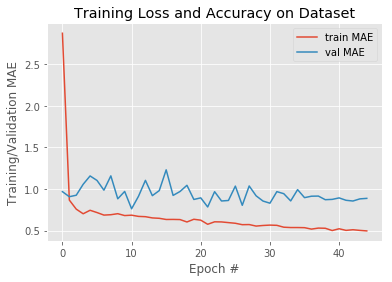

In [28]:
N = 45
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), historyDF.iloc[0:N, 2], label="train MAE")
plt.plot(np.arange(0, N), historyDF.iloc[0:N, 3], label="val MAE")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Training/Validation MAE")
plt.legend(loc="upper right")